# Analysing Results

## Training & Validation Loss
Comparing Training Loss and Validation Loss against Epochs for different models and companies

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt

CLASSIFICATION_RESULTS_PATH = Path("results/benchmarking/classification/")
REGRESSION_RESULTS_PATH = Path("results/benchmarking/regression/")

### Average Across All Tickers

#### Classification 

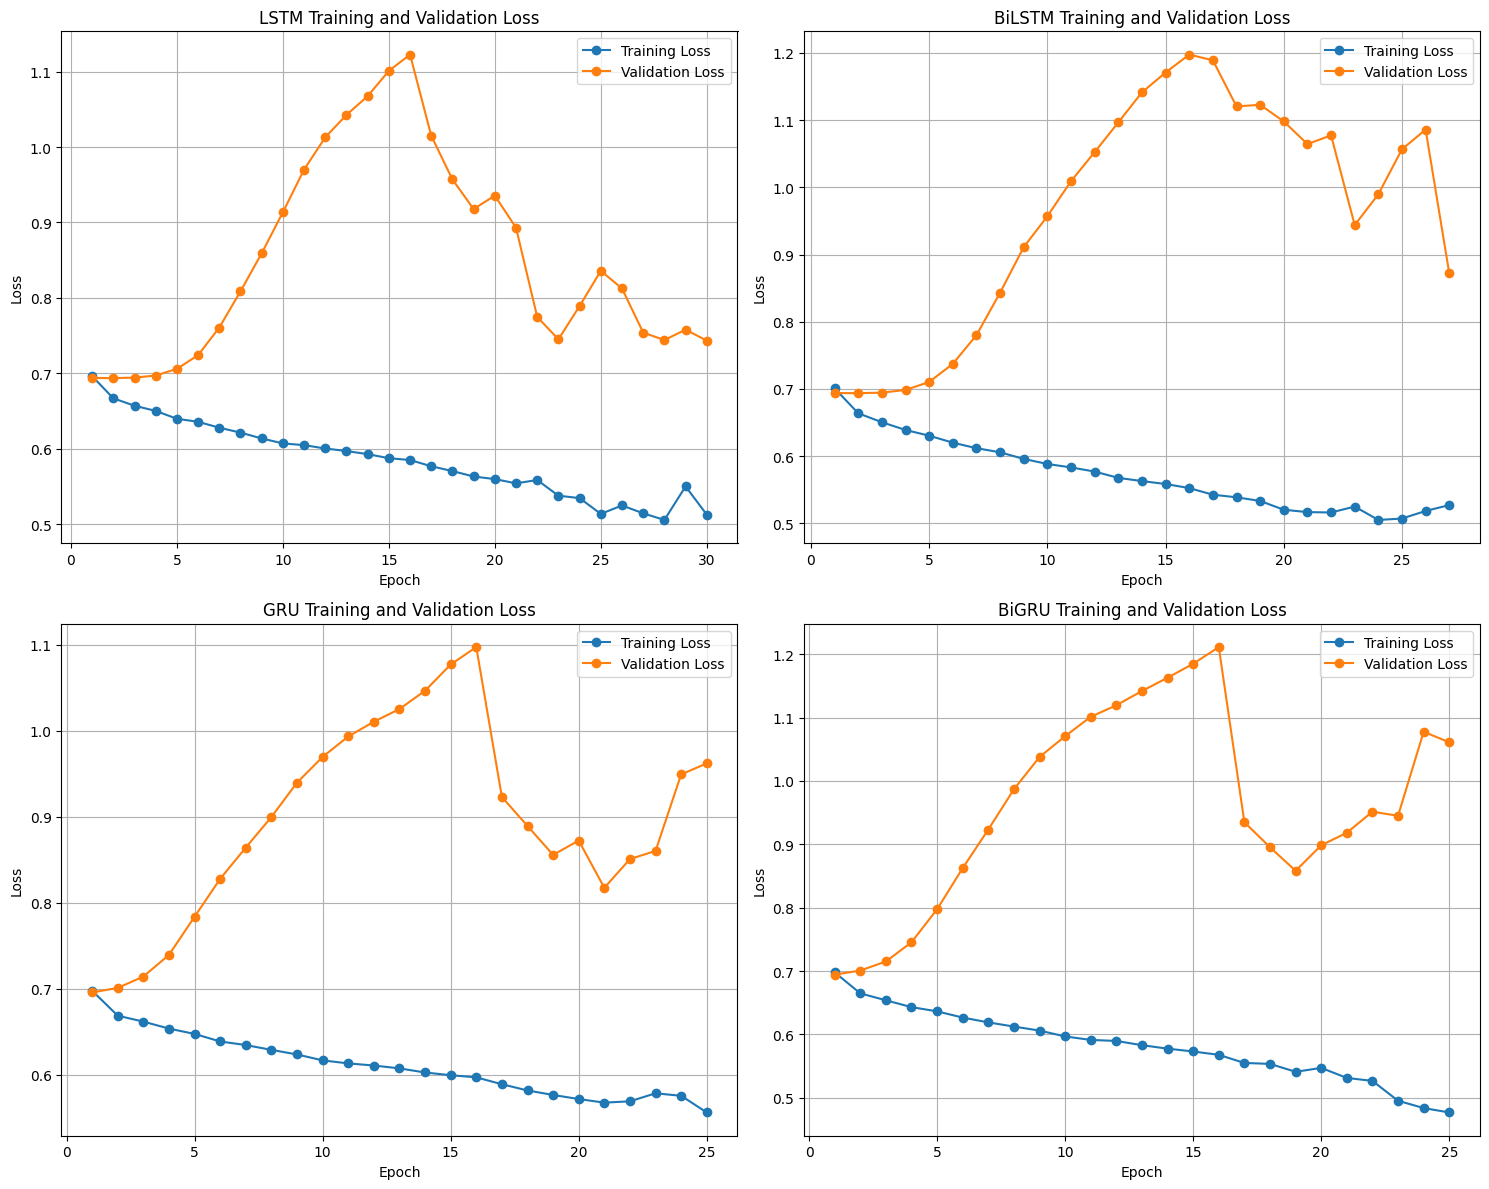

In [18]:
models = ["LSTM", "BiLSTM", "GRU", "BiGRU"]

fig, axes = plt.subplots(2, 2, figsize=(15, 12)) 
axes = axes.flatten()

for i, model_name in enumerate(models):
    csv_path = Path.joinpath(CLASSIFICATION_RESULTS_PATH, f"{model_name}_loss_curves.csv")
    df = pd.read_csv(csv_path)
    
    average_class_loss = df.groupby("epoch")[["train_loss", "val_loss"]].mean().reset_index()
    
    # Plot on the corresponding subplot
    axes[i].plot(average_class_loss["epoch"], average_class_loss["train_loss"], label="Training Loss", marker='o')
    axes[i].plot(average_class_loss["epoch"], average_class_loss["val_loss"], label="Validation Loss", marker='o')
    axes[i].set_title(f"{model_name} Training and Validation Loss")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Loss")
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Regression

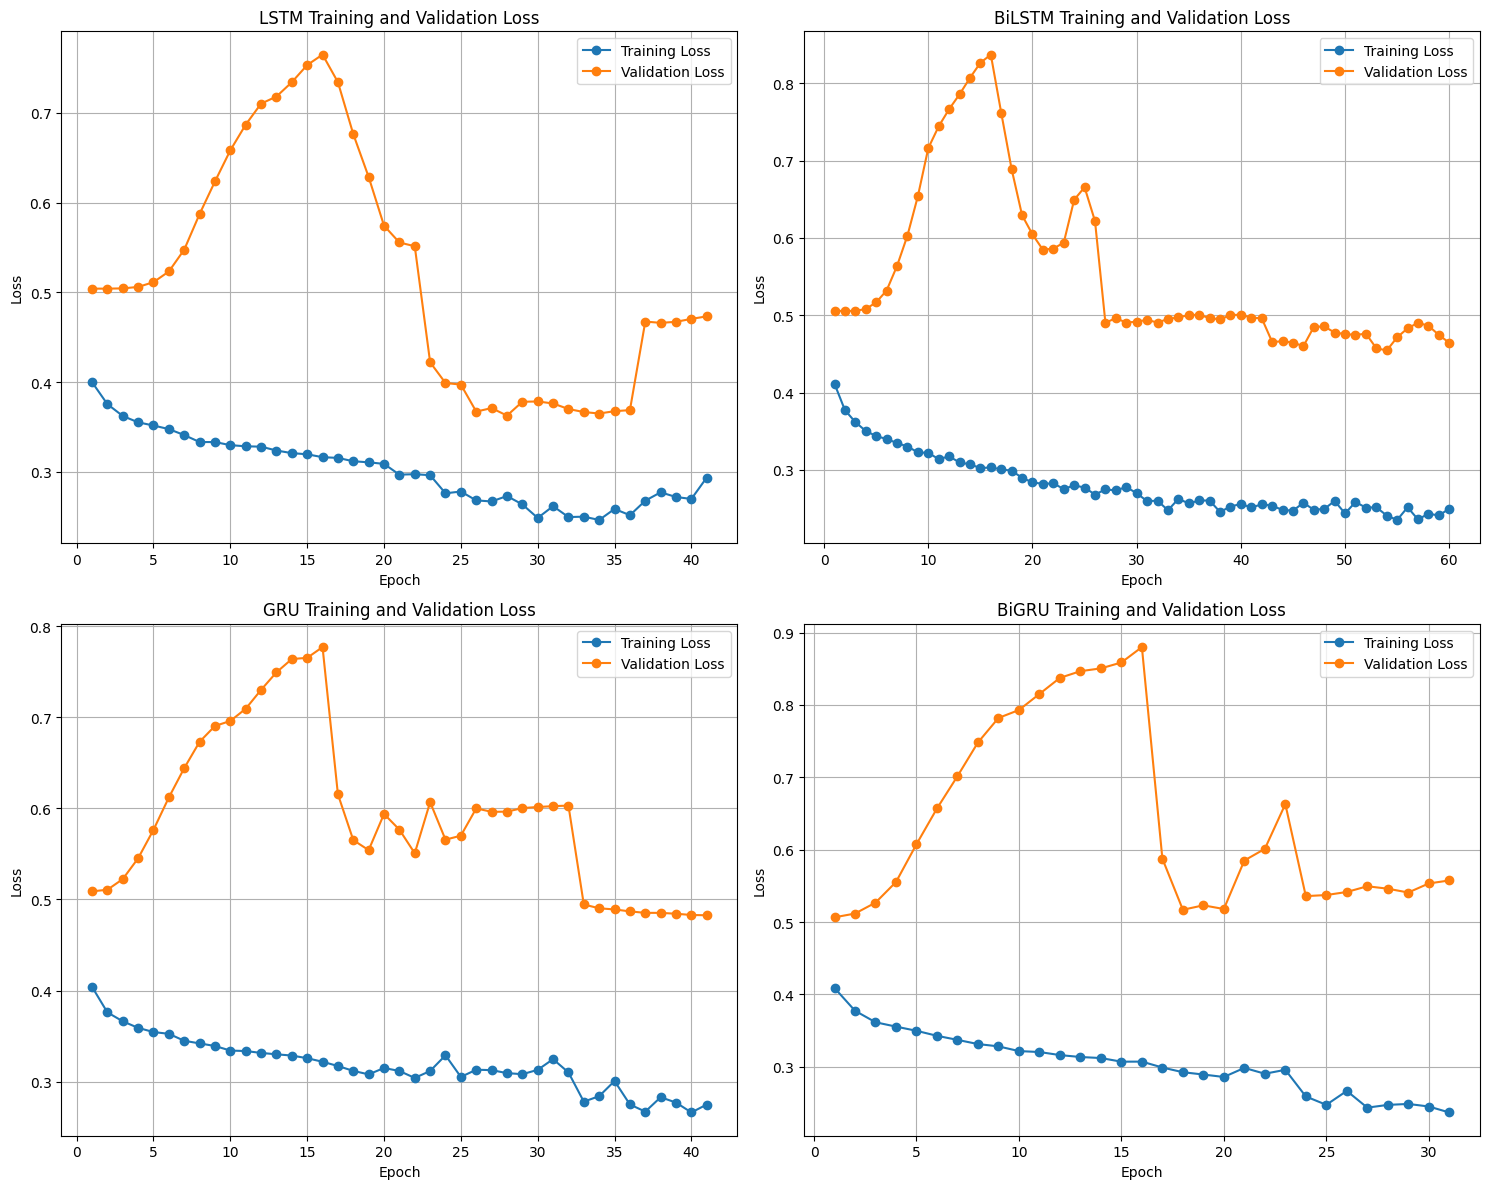

In [26]:
models = ["LSTM", "BiLSTM", "GRU", "BiGRU"]

fig, axes = plt.subplots(2, 2, figsize=(15, 12)) 
axes = axes.flatten()

for i, model_name in enumerate(models):
    csv_path = Path.joinpath(REGRESSION_RESULTS_PATH, f"{model_name}_loss_curves.csv")
    df = pd.read_csv(csv_path)

    average_regression_loss = df.groupby("epoch")[["train_loss", "val_loss"]].mean().reset_index()

    axes[i].plot(average_regression_loss["epoch"], average_regression_loss["train_loss"], label="Training Loss", marker='o')
    axes[i].plot(average_regression_loss["epoch"], average_regression_loss["val_loss"], label="Validation Loss", marker='o')
    axes[i].set_title(f"{model_name} Training and Validation Loss")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Loss")
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

### Sector Specific


#### Classification

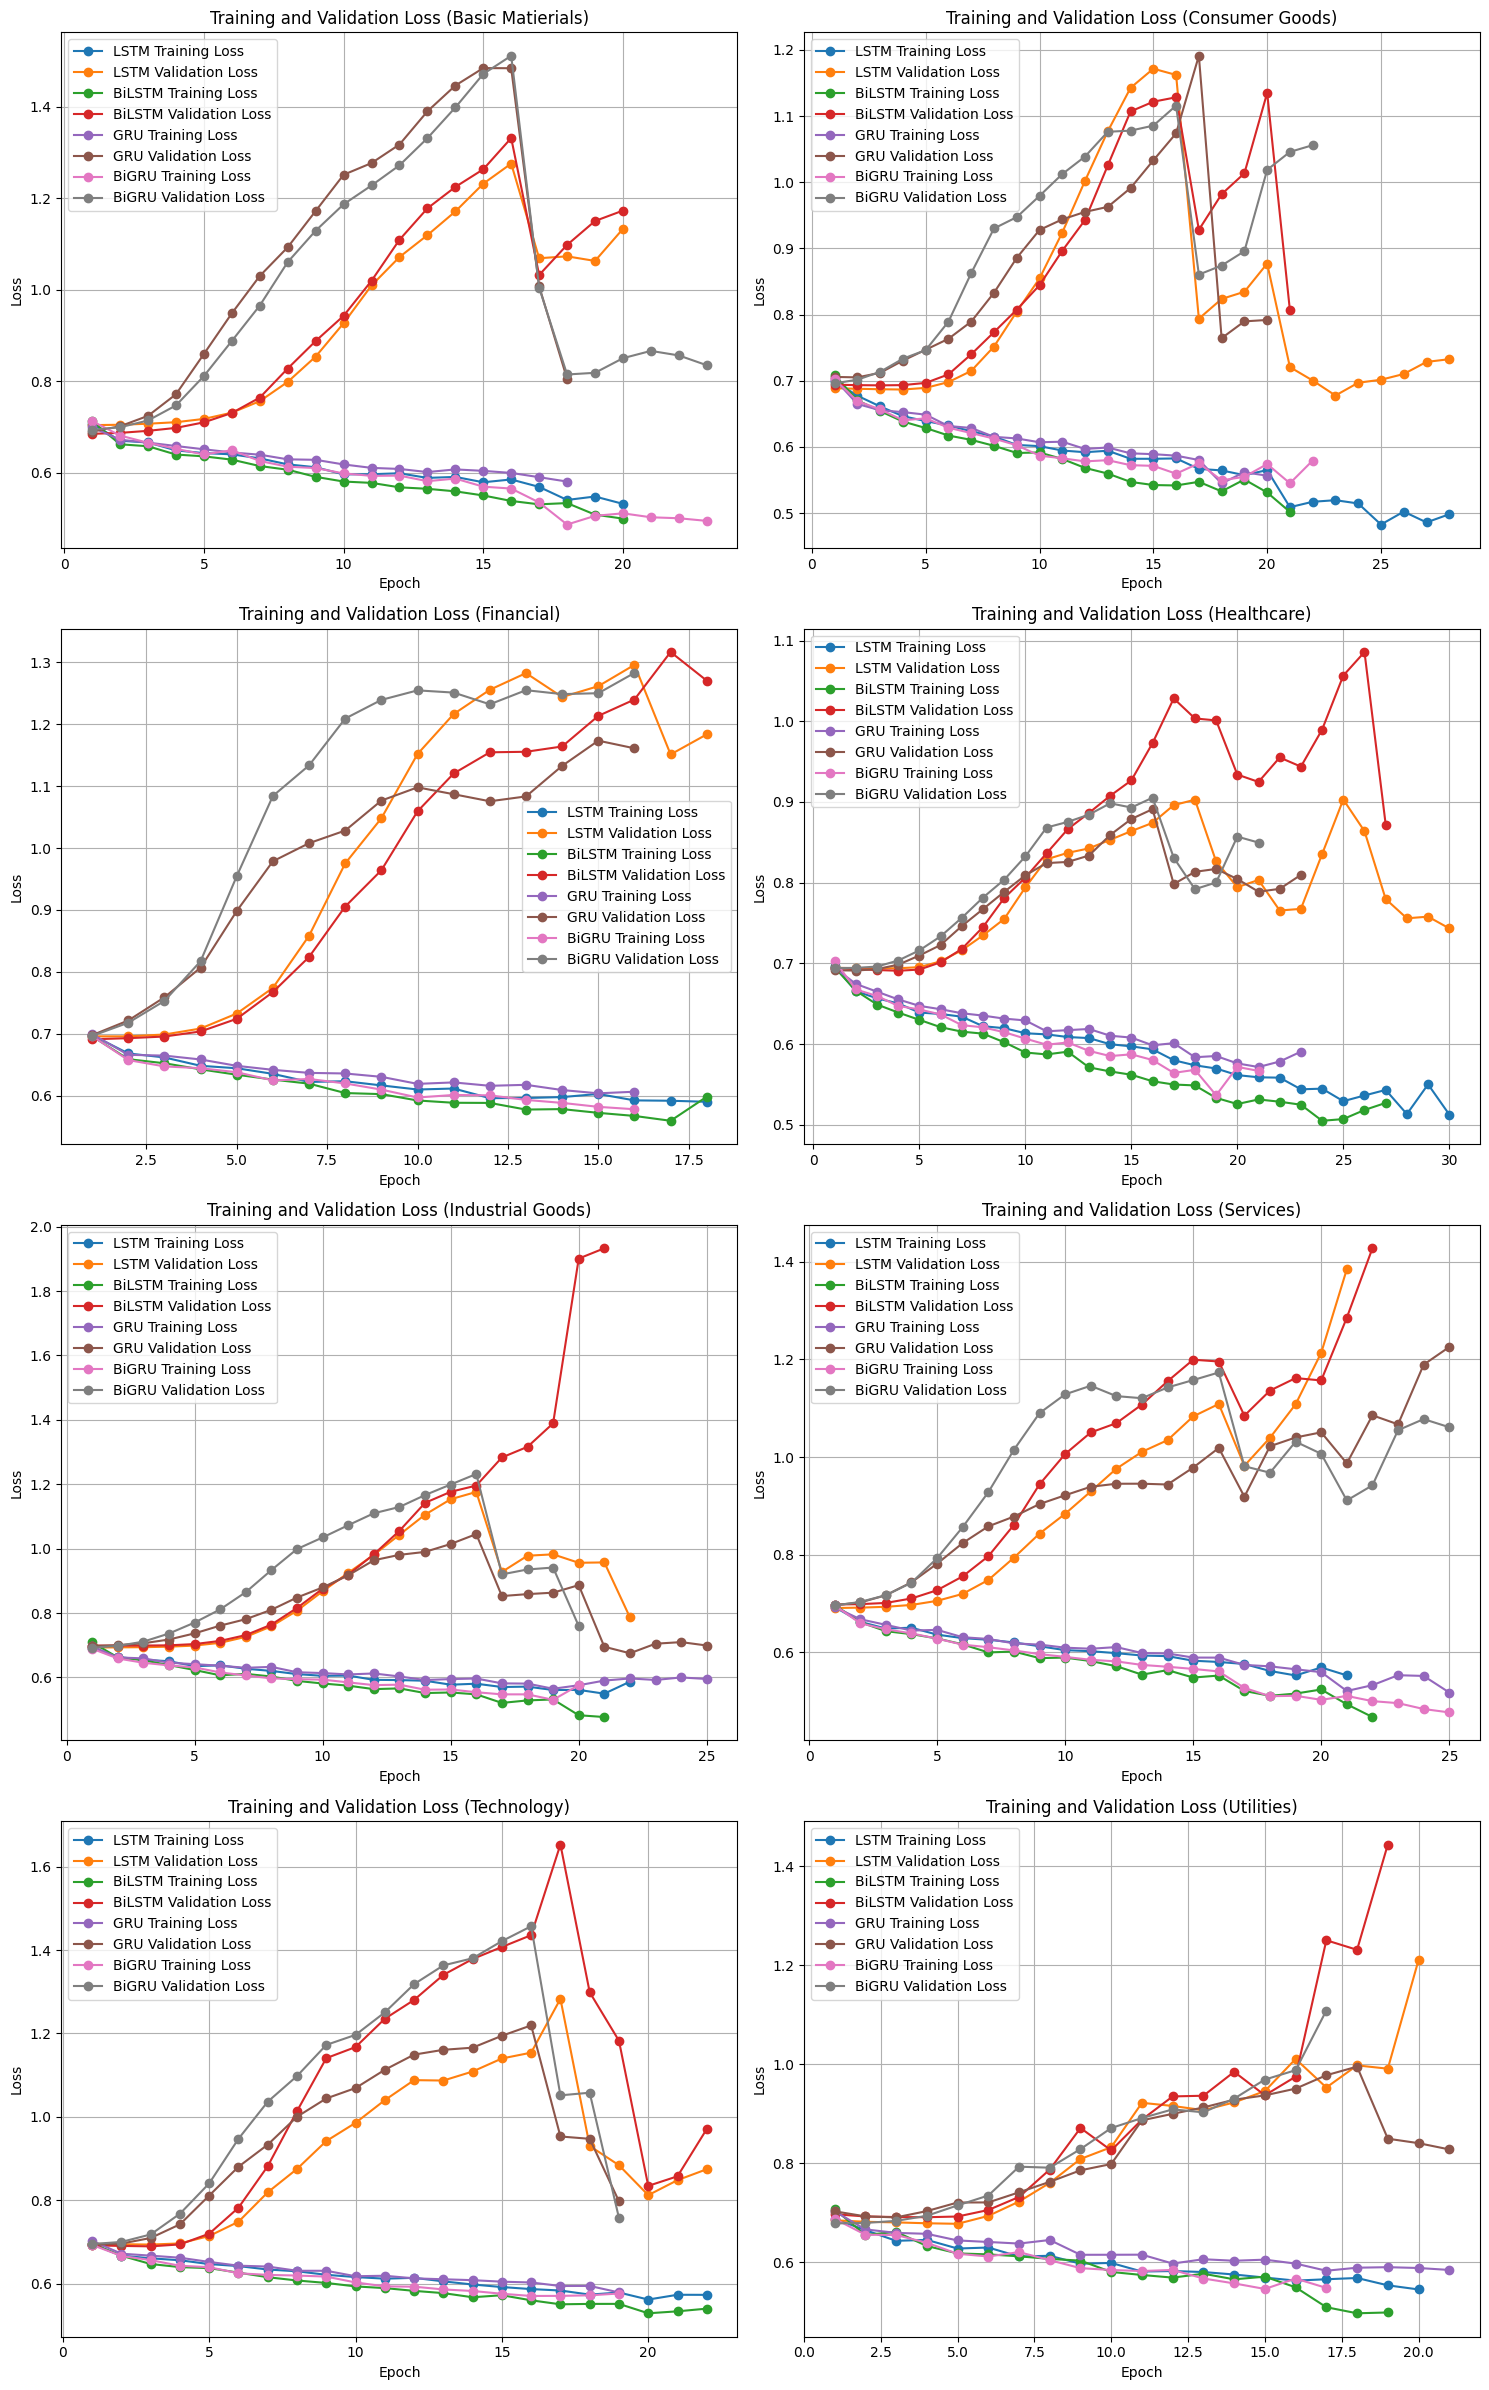

In [41]:
# List of models to process
models = ["LSTM", "BiLSTM", "GRU", "BiGRU"]

# Combine data for all models
all_data = []
for model_name in models:
    csv_path = Path.joinpath(CLASSIFICATION_RESULTS_PATH, f"{model_name}_loss_curves.csv")
    df = pd.read_csv(csv_path)
    df["model"] = model_name 
    all_data.append(df)

combined_df = pd.concat(all_data)

grouped_loss = combined_df.groupby(["sector", "model", "epoch"])[["train_loss", "val_loss"]].mean().reset_index()

sectors = grouped_loss["sector"].unique()
n_cols = 2 
n_rows = -(-len(sectors) // n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
axes = axes.flatten() 

for i, sector in enumerate(sectors):
    sector_data = grouped_loss[grouped_loss["sector"] == sector]
    
    for model_name in models:
        model_data = sector_data[sector_data["model"] == model_name]
        axes[i].plot(model_data["epoch"], model_data["train_loss"], label=f"{model_name} Training Loss", marker='o')
        axes[i].plot(model_data["epoch"], model_data["val_loss"], label=f"{model_name} Validation Loss", marker='o')
    
    axes[i].set_title(f"Training and Validation Loss ({sector})")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Loss")
    axes[i].legend()
    axes[i].grid(True)

for j in range(len(sectors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Regression

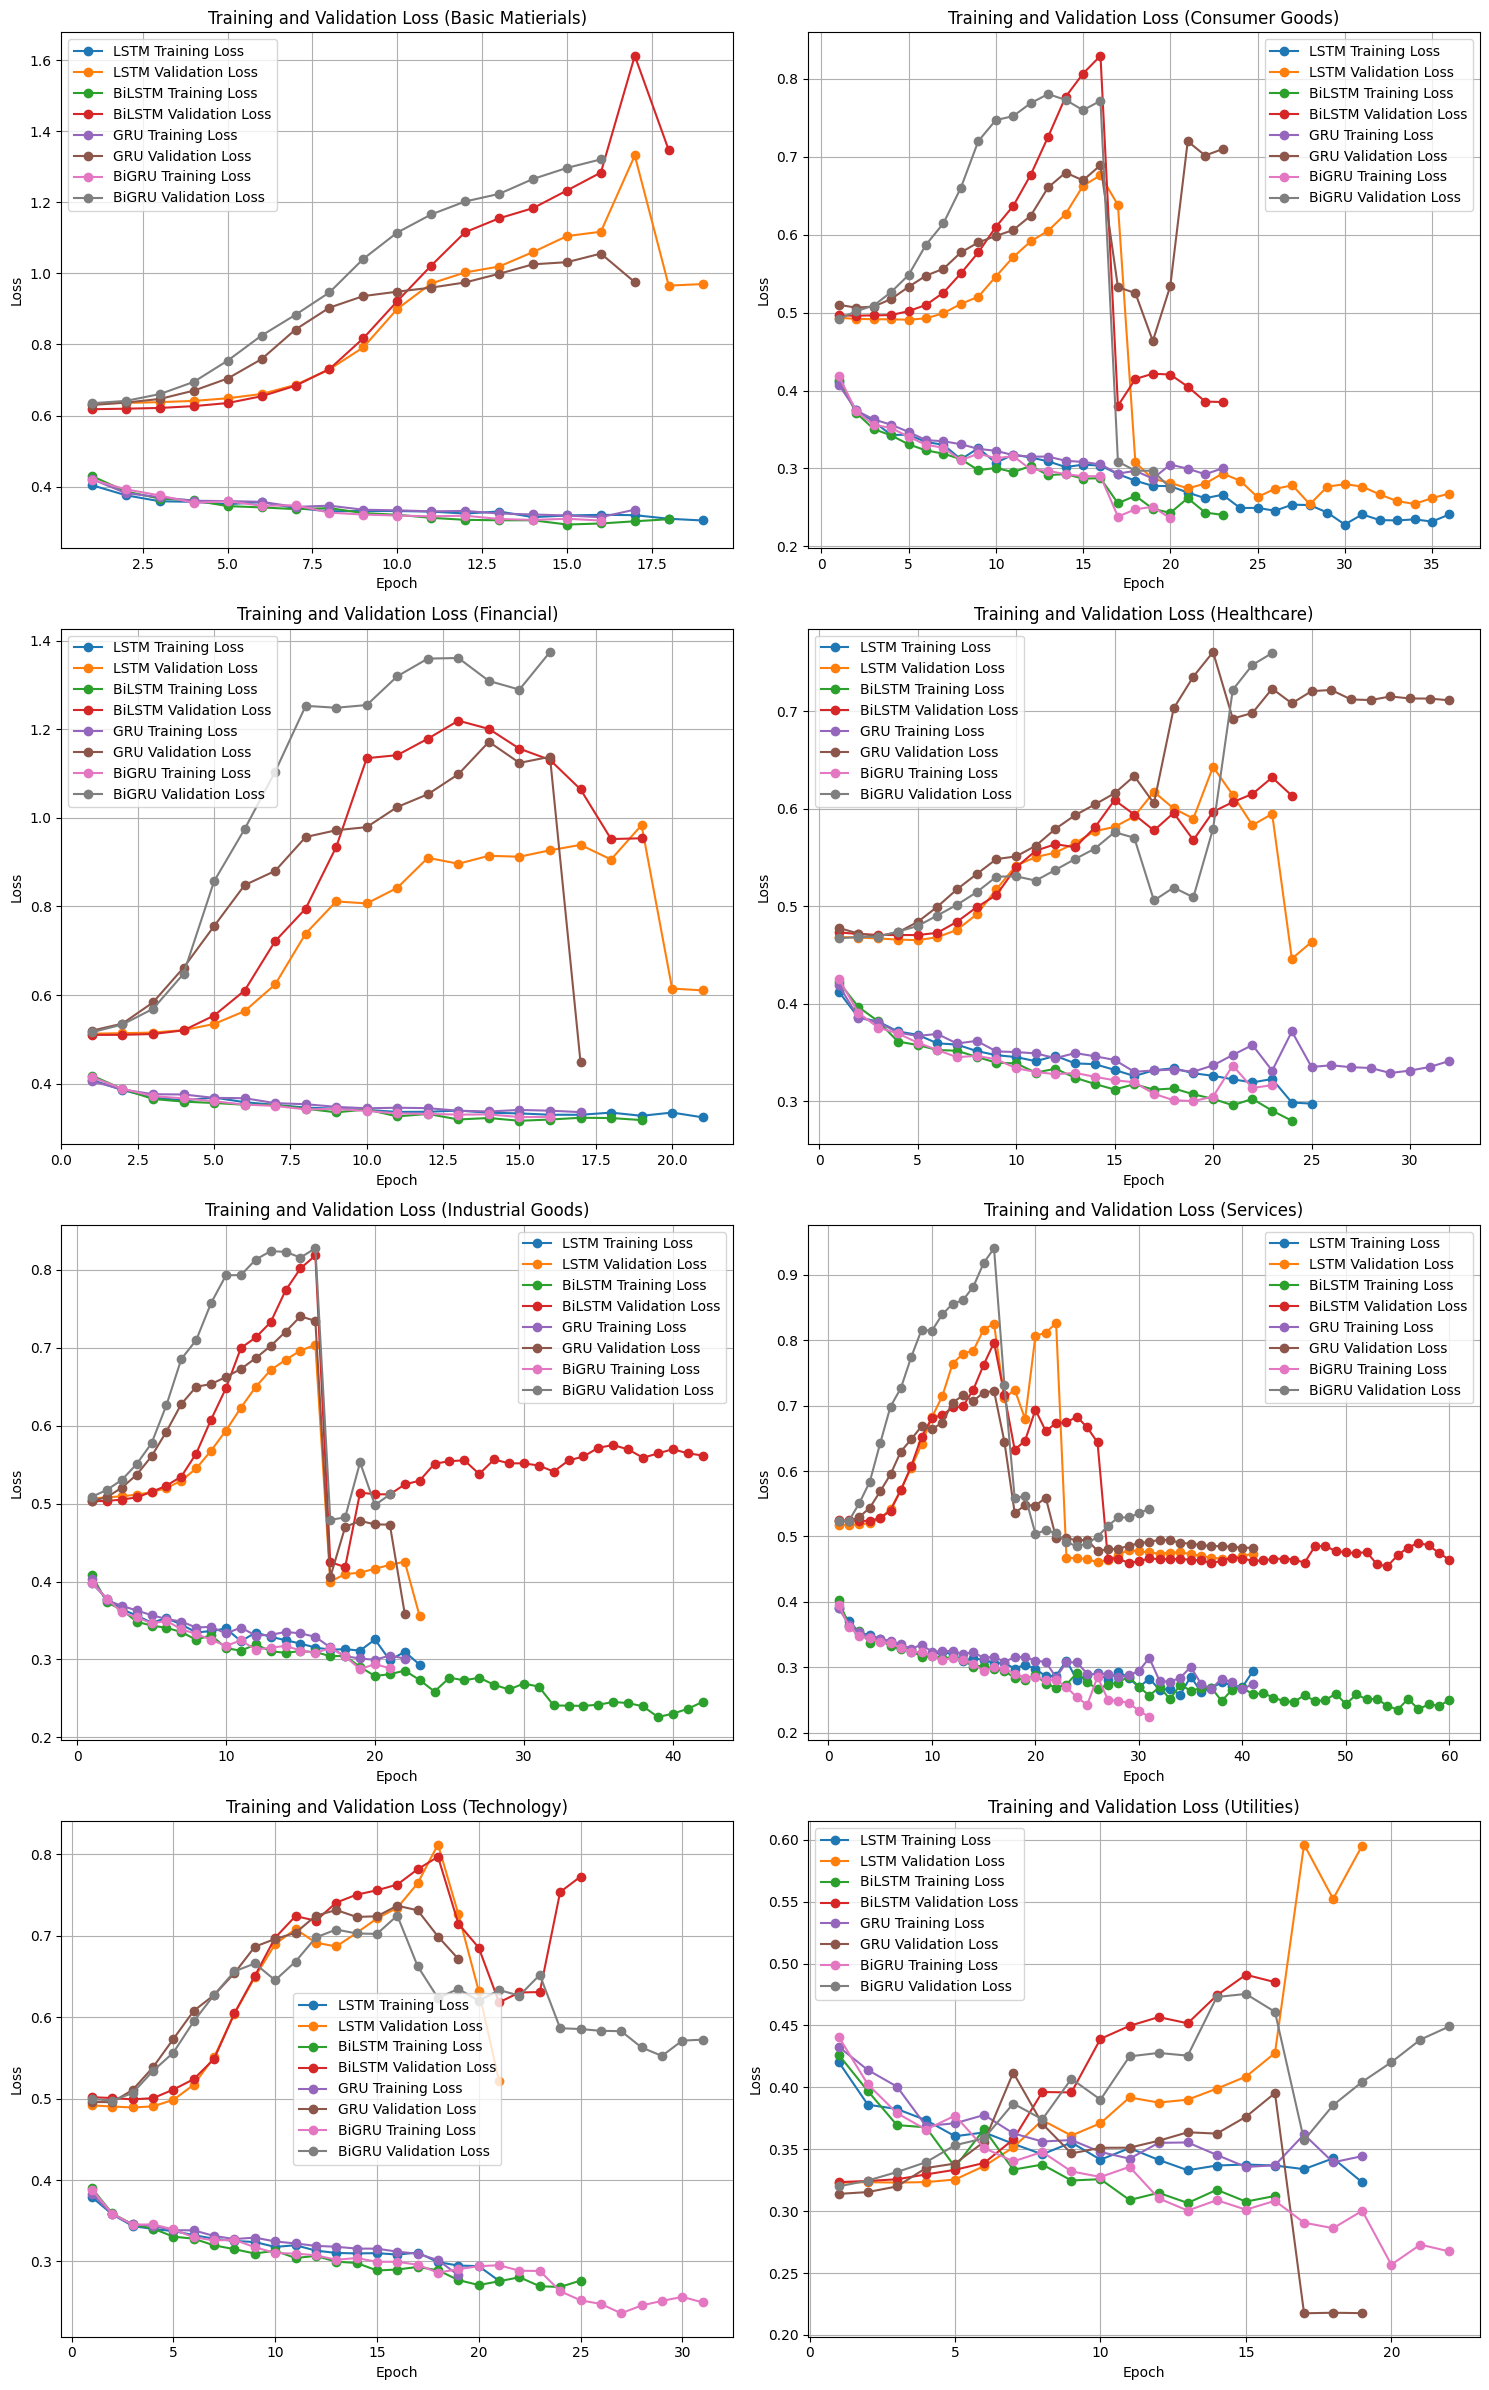

In [42]:
# List of models to process
models = ["LSTM", "BiLSTM", "GRU", "BiGRU"]

# Combine data for all models
all_data = []
for model_name in models:
    csv_path = Path.joinpath(REGRESSION_RESULTS_PATH, f"{model_name}_loss_curves.csv")
    df = pd.read_csv(csv_path)
    df["model"] = model_name 
    all_data.append(df)

combined_df = pd.concat(all_data)

grouped_loss = combined_df.groupby(["sector", "model", "epoch"])[["train_loss", "val_loss"]].mean().reset_index()

sectors = grouped_loss["sector"].unique()
n_cols = 2 
n_rows = -(-len(sectors) // n_cols)  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6 * n_rows))
axes = axes.flatten() 

for i, sector in enumerate(sectors):
    sector_data = grouped_loss[grouped_loss["sector"] == sector]
    
    for model_name in models:
        model_data = sector_data[sector_data["model"] == model_name]
        axes[i].plot(model_data["epoch"], model_data["train_loss"], label=f"{model_name} Training Loss", marker='o')
        axes[i].plot(model_data["epoch"], model_data["val_loss"], label=f"{model_name} Validation Loss", marker='o')
    
    axes[i].set_title(f"Training and Validation Loss ({sector})")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Loss")
    axes[i].legend()
    axes[i].grid(True)

for j in range(len(sectors), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Company Specific